| **Título**     | A01 - Regresión polinomial  |

| **Nombre**     | Michelle Trigo  |

| **Fecha**      | 21/08/25  |

| **Expediente** | 745567  |

Para los datos de los archivos "bateria_tableta.txt" y "Salarios_minimos.csv":

- Realiza regresiones polinomiales de orden 1, 3, 5 y 7.

- Compara el R2 que te da cada modelo.

- Crea una gráfica con una nube de dispersión (datos originales) y tus modelos.

Separa adecuadamente con Markdown.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Bateria Tableta

In [29]:
data = pd.read_csv("bateria_tableta (1).txt")
data=data.to_numpy()
X = data[:, 0].reshape(-1, 1) 
y = data[:, 1].reshape(-1, 1)

#### Regresión polinomial 1

In [30]:
lr1=LinearRegression()
lr1.fit(X,y)

y_pred1 = lr1.predict(X)

r2_1 = r2_score(y, y_pred1)

print("Intercepto",lr1.intercept_,"Coeficientes",lr1.coef_,"R2",r2_1)

Intercepto [2.87054111] Coeficientes [[0.72955585]] R2 0.6872269726243967


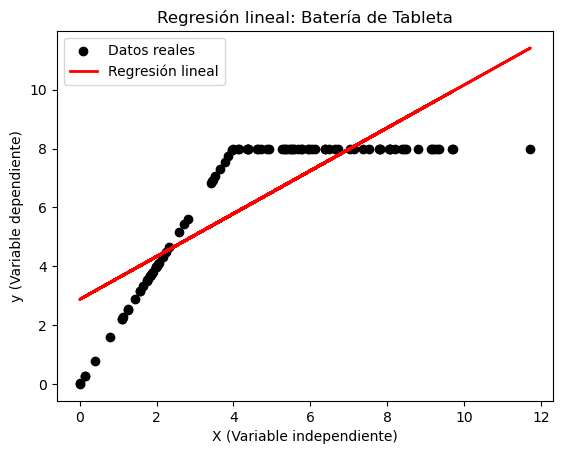

In [32]:
plt.scatter(X, y, color="black", label="Datos reales")
plt.plot(X, y_pred1, color="red", linewidth=2, label="Regresión lineal")

plt.title("Regresión lineal: Batería de Tableta")
plt.xlabel("X (Variable independiente)")
plt.ylabel("y (Variable dependiente)")
plt.legend()
plt.show()

#### Regresión polinomial 3

In [37]:
X3 = np.hstack([X, X**2, X**3]) 

lr3=LinearRegression() 
lr3.fit(X3,y) 

y_pred3 = lr3.predict(X3) 

r2_3 = r2_score(y, y_pred3) 

print("Intercepto",lr3.intercept_,"Coeficientes",lr3.coef_,"R2",r2_3)

Intercepto [-0.84459866] Coeficientes [[ 3.34240792 -0.39326189  0.01452403]] R2 0.9780671146743033


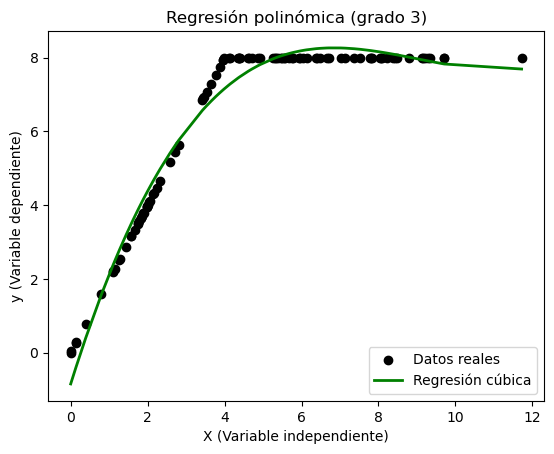

In [38]:
X_sorted = np.sort(X, axis=0)
X3_sorted = np.hstack([X_sorted, X_sorted**2, X_sorted**3])
y_pred_sorted = lr3.predict(X3_sorted)

plt.scatter(X, y, color="black", label="Datos reales")
plt.plot(X_sorted, y_pred_sorted, color="green", linewidth=2, label="Regresión cúbica")

plt.title("Regresión polinómica (grado 3)")
plt.xlabel("X (Variable independiente)")
plt.ylabel("y (Variable dependiente)")
plt.legend()
plt.show()

#### Regresión polinomial 5

In [39]:
X5 = np.hstack([X, X**2, X**3, X**4, X**5]) 

lr5=LinearRegression() 
lr5.fit(X5,y) 

y_pred5 = lr5.predict(X5) 

r2_5 = r2_score(y, y_pred5) 

print("Intercepto",lr5.intercept_,"Coeficientes",lr5.coef_,"R2",r2_5)

Intercepto [0.14276245] Coeficientes [[ 8.35890085e-01  1.10347381e+00 -3.23550360e-01  3.20123836e-02
  -1.07054199e-03]] R2 0.9953630126134434


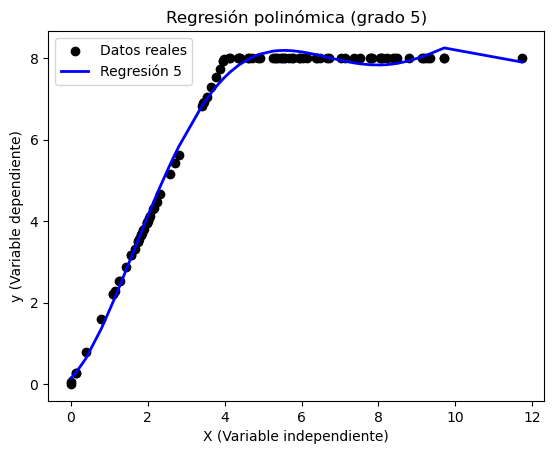

In [40]:
X5_sorted = np.hstack([X_sorted, X_sorted**2, X_sorted**3, X_sorted**4, X_sorted**5])
y_pred_sorted = lr5.predict(X5_sorted)

plt.scatter(X, y, color="black", label="Datos reales")
plt.plot(X_sorted, y_pred_sorted, color="blue", linewidth=2, label="Regresión 5")

plt.title("Regresión polinómica (grado 5)")
plt.xlabel("X (Variable independiente)")
plt.ylabel("y (Variable dependiente)")
plt.legend()
plt.show()

#### Regresión polinomial 7

In [18]:
polyX7 = PolynomialFeatures(degree=7)
X_7 = polyX7.fit_transform(X)
X_7=X_7[:, 1:]

lr7=LinearRegression()
lr7.fit(X_7,y)

y_pred7 = lr7.predict(X_7)

r2_7 = r2_score(y, y_pred7)

print("Intercepto",lr7.intercept_,"Coeficientes",lr7.coef_,"R2",r2_7)

Intercepto [-0.02673001] Coeficientes [[ 2.63586646e+00 -1.38252388e+00  1.01240187e+00 -3.16715233e-01
   4.60134802e-02 -3.15491538e-03  8.27801489e-05]] R2 0.9980965602454169


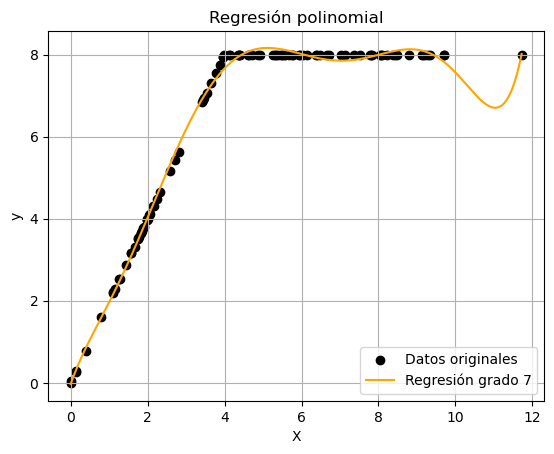

In [19]:
X_plot7 = polyX7.fit_transform(X_plot)[:, 1:]
y_plot7 = lr7.predict(X_plot7)

plt.scatter(X, y, color='black', label='Datos originales')
plt.plot(X_plot, y_plot7, label='Regresión grado 7', color='orange')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión polinomial')
plt.grid()
plt.legend()
plt.show()

#### Gráfica

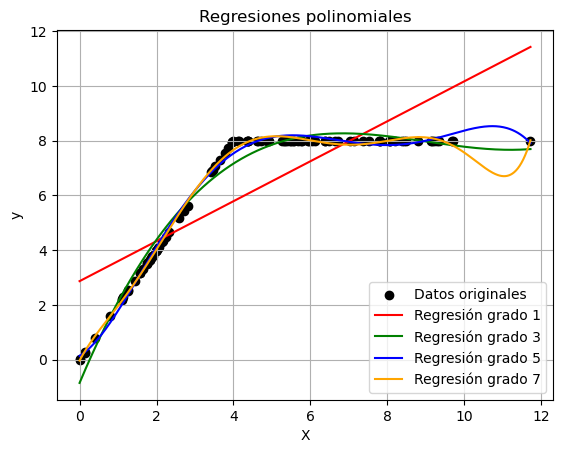

In [7]:
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

X_plot1 = polyX1.fit_transform(X_plot)[:, 1:]
y_plot1 = lr1.predict(X_plot1)
X_plot3 = polyX3.fit_transform(X_plot)[:, 1:]
y_plot3 = lr3.predict(X_plot3)
X_plot5 = polyX5.fit_transform(X_plot)[:, 1:]
y_plot5 = lr5.predict(X_plot5)
X_plot7 = polyX7.fit_transform(X_plot)[:, 1:]
y_plot7 = lr7.predict(X_plot7)

plt.scatter(X, y, color='black', label='Datos originales')
plt.plot(X_plot, y_plot1, label='Regresión grado 1', color='red')
plt.plot(X_plot, y_plot3, label='Regresión grado 3', color='green')
plt.plot(X_plot, y_plot5, label='Regresión grado 5', color='blue')
plt.plot(X_plot, y_plot7, label='Regresión grado 7', color='orange')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresiones polinomiales')
plt.grid()
plt.legend()
plt.show()


In [8]:
r2 = pd.DataFrame({
    "Grado": [1, 3, 5, 7],
    "R2": [r2_1, r2_3, r2_5, r2_7]})
r2 = r2.set_index("Grado")
r2

,R2
Grado,
1,0.687227
3,0.978067
5,0.995363
7,0.998097


Se puede observar que a partir de 4 horas de carga la duración de la batería permanece constante. Significa que los datos a partir de ahí son ruido y no sirven más que para lastimar el modelo.

### Salarios mínimos

In [41]:
df = pd.read_csv("Salarios_minimos (1).csv")
matriz = df.to_numpy()
X = matriz[:, 0].reshape(-1, 1) 
y = matriz[:, 1].reshape(-1, 1)
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

#### Regresión polinomial 1

In [45]:
polyX1 = PolynomialFeatures(degree=1)
X_1 = polyX1.fit_transform(X)
X_1=X_1[:, 1:]

lr1=LinearRegression()
lr1.fit(X_1,y)

y_pred1 = lr1.predict(X_1)

r2_1 = r2_score(y, y_pred1)

print("Intercepto",lr1.intercept_,"Coeficientes",lr1.coef_,"R2",r2_1)

Intercepto [-5022.60217164] Coeficientes [[2.52832885]] R2 0.9844566663095202


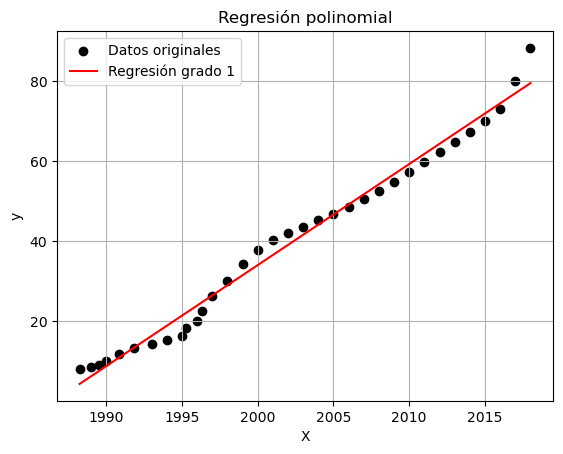

In [49]:
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

X_plot1 = polyX1.fit_transform(X_plot)[:, 1:]
y_plot1 = lr1.predict(X_plot1)

plt.scatter(X, y, color='black', label='Datos originales')
plt.plot(X_plot, y_plot1, label='Regresión grado 1', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión polinomial')
plt.grid()
plt.legend()
plt.show()

#### Regresión polinomial 3


In [50]:
polyX3 = PolynomialFeatures(degree=3)
X_3 = polyX3.fit_transform(X)
X_3=X_3[:, 1:]

lr3=LinearRegression()
lr3.fit(X_3,y)

y_pred3 = lr3.predict(X_3)

r2_3 = r2_score(y, y_pred3)

print("Intercepto",lr3.intercept_,"Coeficientes",lr3.coef_,"R2",r2_3)

Intercepto [-5217722.9556011] Coeficientes [[ 7.83146244e+03 -3.91934110e+00  6.54024499e-04]] R2 0.9857366949648437


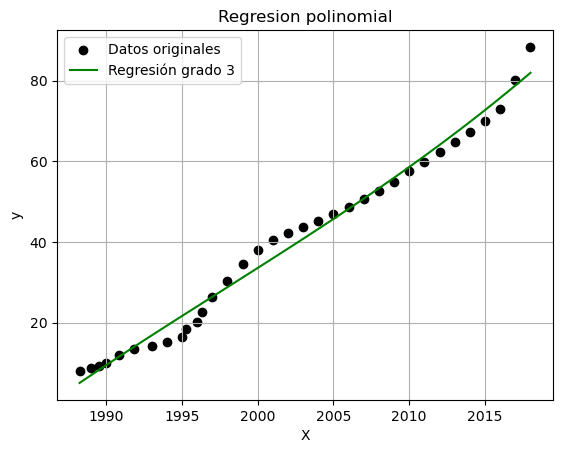

In [51]:
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

X_plot3 = polyX3.fit_transform(X_plot)[:, 1:]
y_plot3 = lr3.predict(X_plot3)

plt.scatter(X, y, color='black', label='Datos originales')
plt.plot(X_plot, y_plot3, label='Regresión grado 3', color='green')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresion polinomial')
plt.grid()
plt.legend()
plt.show()

#### Regresión polinomial 5

In [54]:
polyX5 = PolynomialFeatures(degree=5)
X_5 = polyX5.fit_transform(X)
X_5=X_5[:, 1:]

lr5=LinearRegression()
lr5.fit(X_5,y)

y_pred5 = lr5.predict(X_5)

r2_5 = r2_score(y, y_pred5)

print("Intercepto",lr5.intercept_,"Coeficientes",lr5.coef_,"R2",r2_5)

Intercepto [-534328.79076436] Coeficientes [[ 3.32926286e-10  6.66841134e-07  6.67827159e-04 -5.01138166e-07
   1.00311032e-10]] R2 0.9857546631356386


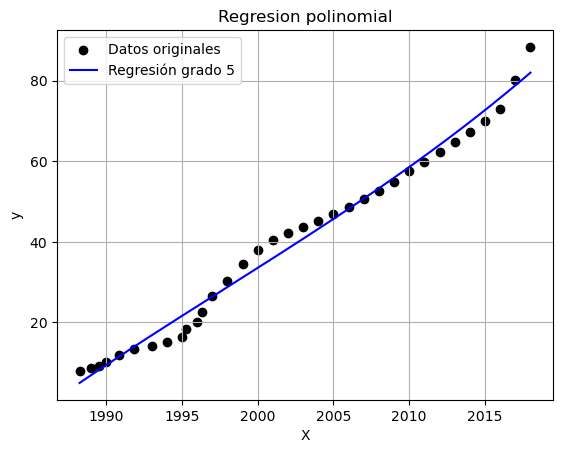

In [55]:
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

X_plot5 = polyX5.fit_transform(X_plot)[:, 1:]
y_plot5 = lr5.predict(X_plot5)

plt.scatter(X, y, color='black', label='Datos originales')
plt.plot(X_plot, y_plot5, label='Regresión grado 5', color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresion polinomial')
plt.grid()
plt.legend()
plt.show()

#### Regresión polinomial 7

In [59]:
polyX7 = PolynomialFeatures(degree=7)
X_7 = polyX7.fit_transform(X)
X_7=X_7[:, 1:]

lr7=LinearRegression()
lr7.fit(X_7,y)

y_pred7 = lr7.predict(X_7)

r2_7 = r2_score(y, y_pred7)

print("Intercepto",lr7.intercept_,"Coeficientes",lr7.coef_,"R2",r2_7)

Intercepto [-156804.77983421] Coeficientes [[ 1.91160388e-23 -4.40574261e-19  9.20290339e-17  1.22888842e-13
   1.02560835e-10 -8.54813519e-14  1.83257513e-17]] R2 0.9857730993935226


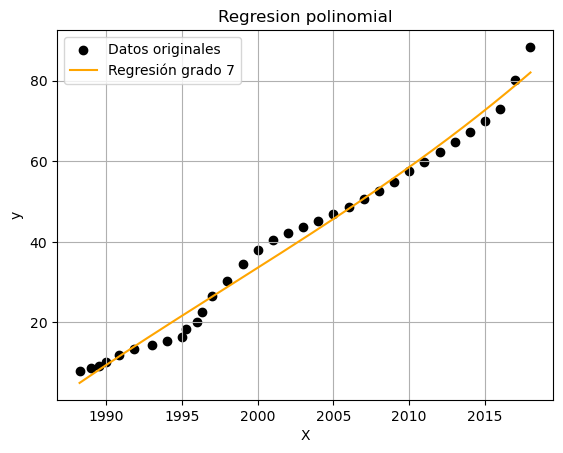

In [60]:
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

X_plot7 = polyX7.fit_transform(X_plot)[:, 1:]
y_plot7 = lr7.predict(X_plot7)

plt.scatter(X, y, color='black', label='Datos originales')
plt.plot(X_plot, y_plot7, label='Regresión grado 7', color='orange')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresion polinomial')
plt.grid()
plt.legend()
plt.show()

#### Gráfica

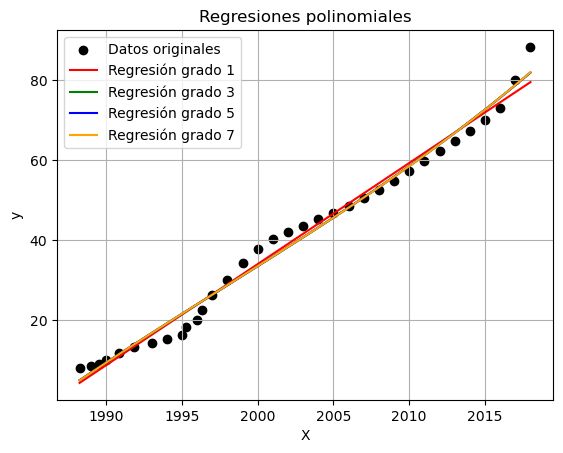

In [61]:
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

X_plot1 = polyX1.fit_transform(X_plot)[:, 1:]
y_plot1 = lr1.predict(X_plot1)
X_plot3 = polyX3.fit_transform(X_plot)[:, 1:]
y_plot3 = lr3.predict(X_plot3)
X_plot5 = polyX5.fit_transform(X_plot)[:, 1:]
y_plot5 = lr5.predict(X_plot5)
X_plot7 = polyX7.fit_transform(X_plot)[:, 1:]
y_plot7 = lr7.predict(X_plot7)

plt.scatter(X, y, color='black', label='Datos originales')
plt.plot(X_plot, y_plot1, label='Regresión grado 1', color='red')
plt.plot(X_plot, y_plot3, label='Regresión grado 3', color='green')
plt.plot(X_plot, y_plot5, label='Regresión grado 5', color='blue')
plt.plot(X_plot, y_plot7, label='Regresión grado 7', color='orange')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresiones polinomiales')
plt.grid()
plt.legend()
plt.show()


In [62]:
r2 = pd.DataFrame({
    "Grado": [1, 3, 5, 7],
    "R2": [r2_1, r2_3, r2_5, r2_7]})
r2 = r2.set_index("Grado")
r2

,R2
Grado,
1,0.984457
3,0.985737
5,0.985755
7,0.985773
